# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [48]:
sinasc_raw = pd.read_csv('../SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [49]:
sinasc = sinasc_raw[['munResNome', 'munResLat', 'munResAlt', 'munResArea', 'QTDPARTNOR', 'QTDPARTCES']]

In [50]:
sinasc_raw.columns.array

<PandasArray>
[      'ORIGEM',     'CODESTAB',   'CODMUNNASC',      'LOCNASC',
     'IDADEMAE',    'ESTCIVMAE',       'ESCMAE',   'CODOCUPMAE',
   'QTDFILVIVO',   'QTDFILMORT',    'CODMUNRES',     'GESTACAO',
     'GRAVIDEZ',        'PARTO',    'CONSULTAS',       'DTNASC',
     'HORANASC',         'SEXO',       'APGAR1',       'APGAR5',
      'RACACOR',         'PESO',     'IDANOMAL',   'DTCADASTRO',
    'CODANOMAL',   'NUMEROLOTE',   'VERSAOSIST',    'DTRECEBIM',
      'DIFDATA',   'DTRECORIGA',   'NATURALMAE',   'CODMUNNATU',
    'CODUFNATU',   'ESCMAE2010',   'SERIESCMAE',    'DTNASCMAE',
   'RACACORMAE',   'QTDGESTANT',   'QTDPARTNOR',   'QTDPARTCES',
     'IDADEPAI',   'DTULTMENST',   'SEMAGESTAC',   'TPMETESTIM',
   'CONSPRENAT',    'MESPRENAT',   'TPAPRESENT',   'STTRABPART',
   'STCESPARTO',   'TPNASCASSI',   'TPFUNCRESP',    'TPDOCRESP',
   'DTDECLARAC',   'ESCMAEAGR1',   'STDNEPIDEM',     'STDNNOVA',
   'CODPAISRES',     'TPROBSON',     'PARIDADE',   'KOTELCHUCK',
     'CONTA

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [51]:
sinasc_lat = sinasc_raw[['munResLat', 'QTDPARTNOR', 'QTDPARTCES']]

In [52]:
mun_res_lat = sinasc_lat['munResLat'].values
mun_res_lat
mapping_mun_res_lat = {}
for value in mun_res_lat:
    map_dict = {value: 'latitude_acima' if value > -10.5 else 'latitude_abaixo'}
    mapping_mun_res_lat.update(map_dict)

In [53]:
sinasc_latitude = sinasc_lat.set_index('munResLat')
soma = sinasc_latitude.groupby(mapping_mun_res_lat).sum(numeric_only=True)
media = sinasc_latitude.groupby(mapping_mun_res_lat).mean(numeric_only=True)
minimo = sinasc_latitude.groupby(mapping_mun_res_lat).min(numeric_only=True)
maximo = sinasc_latitude.groupby(mapping_mun_res_lat).max(numeric_only=True)
desvio_padrao = sinasc_latitude.groupby(mapping_mun_res_lat).std(numeric_only=True)
variancia = sinasc_latitude.groupby(mapping_mun_res_lat).var(numeric_only=True)

In [54]:
print("soma")
soma

soma


,QTDPARTNOR,QTDPARTCES
munResLat,,
latitude_abaixo,5800.0,7095.0
latitude_acima,8771.0,6041.0


In [55]:
print("media")
media

media


,QTDPARTNOR,QTDPARTCES
munResLat,,
latitude_abaixo,0.452242,0.552570
latitude_acima,0.711759,0.487335


In [56]:
print("minimo")
minimo

minimo


,QTDPARTNOR,QTDPARTCES
munResLat,,
latitude_abaixo,0.0,0.0
latitude_acima,0.0,0.0


In [57]:
print("maximo")
maximo

maximo


,QTDPARTNOR,QTDPARTCES
munResLat,,
latitude_abaixo,41.0,12.0
latitude_acima,40.0,12.0


In [58]:
print("desvio_padrao")
desvio_padrao

desvio_padrao


,QTDPARTNOR,QTDPARTCES
munResLat,,
latitude_abaixo,1.123426,0.753036
latitude_acima,1.279042,0.737899


In [59]:
print("variancia")
variancia

variancia


,QTDPARTNOR,QTDPARTCES
munResLat,,
latitude_abaixo,1.262087,0.567062
latitude_acima,1.635949,0.544495


### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [60]:
sinasc_area = sinasc_raw[['munResArea', 'QTDPARTNOR', 'QTDPARTCES']]

In [61]:
mun_res_lat = sinasc_area['munResArea'].values
mun_res_lat
mapping_mun_res_area = {}
for value in mun_res_lat:
    map_dict = {value: 'area_acima' if value > 3_000 else 'area_abaixo'}
    mapping_mun_res_area.update(map_dict)

In [62]:
sinasc_latitude = sinasc_area.set_index('munResArea')
soma = sinasc_latitude.groupby(mapping_mun_res_area).sum(numeric_only=True)
media = sinasc_latitude.groupby(mapping_mun_res_area).mean(numeric_only=True)
minimo = sinasc_latitude.groupby(mapping_mun_res_area).min(numeric_only=True)
maximo = sinasc_latitude.groupby(mapping_mun_res_area).max(numeric_only=True)
desvio_padrao = sinasc_latitude.groupby(mapping_mun_res_area).std(numeric_only=True)
variancia = sinasc_latitude.groupby(mapping_mun_res_area).var(numeric_only=True)

In [63]:
print("soma")
soma

soma


,QTDPARTNOR,QTDPARTCES
munResArea,,
area_abaixo,1912.0,2952.0
area_acima,12659.0,10184.0


In [64]:
print("media")
media

media


,QTDPARTNOR,QTDPARTCES
munResArea,,
area_abaixo,0.371334,0.572981
area_acima,0.632982,0.507070


In [65]:
print("minimo")
minimo

minimo


,QTDPARTNOR,QTDPARTCES
munResArea,,
area_abaixo,0.0,0.0
area_acima,0.0,0.0


In [66]:
print("maximo")
maximo

maximo


,QTDPARTNOR,QTDPARTCES
munResArea,,
area_abaixo,10.0,5.0
area_acima,41.0,12.0


In [67]:
print("desvio_padrao")
desvio_padrao

desvio_padrao


,QTDPARTNOR,QTDPARTCES
munResArea,,
area_abaixo,0.856441,0.749368
area_acima,1.278932,0.744981


In [68]:
print("variancia")
variancia

variancia


,QTDPARTNOR,QTDPARTCES
munResArea,,
area_abaixo,0.733490,0.561553
area_acima,1.635668,0.554997


### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [69]:
sinasc_alt = sinasc_raw[['munResAlt', 'QTDPARTNOR', 'QTDPARTCES']]

In [70]:
sinasc_describe = sinasc_alt['munResAlt'].describe().to_dict()
sinasc_describe

{'count': 27027.0,
 'mean': 179.11199911199913,
 'std': 123.1383651888263,
 'min': 85.0,
 '25%': 87.0,
 '50%': 153.0,
 '75%': 191.0,
 'max': 595.0}

In [71]:
mun_res_lat = sinasc_alt['munResAlt'].values
mun_res_lat
mapping_mun_res_alt = {}
for value in mun_res_lat:
    if value < sinasc_describe['25%']:
        map_dict = {value: 'primeiro_quartil'}
    elif value > sinasc_describe['25%'] and value < sinasc_describe['50%']:
        map_dict = {value: 'segundo_quartil'}
    elif value > sinasc_describe['50%'] and value < sinasc_describe['75%']:
        map_dict = {value: 'terceiro_quartil'}
    else:
        map_dict = {value: 'quarto_quartil'}
    mapping_mun_res_alt.update(map_dict)

In [72]:
sinasc_latitude = sinasc_alt.set_index('munResAlt')
soma = sinasc_latitude.groupby(mapping_mun_res_alt).sum(numeric_only=True)
media = sinasc_latitude.groupby(mapping_mun_res_alt).mean(numeric_only=True)
minimo = sinasc_latitude.groupby(mapping_mun_res_alt).min(numeric_only=True)
maximo = sinasc_latitude.groupby(mapping_mun_res_alt).max(numeric_only=True)
desvio_padrao = sinasc_latitude.groupby(mapping_mun_res_alt).std(numeric_only=True)
variancia = sinasc_latitude.groupby(mapping_mun_res_alt).var(numeric_only=True)

In [73]:
print("soma")
soma

soma


,QTDPARTNOR,QTDPARTCES
munResAlt,,
primeiro_quartil,308.0,139.0
quarto_quartil,8405.0,7684.0
segundo_quartil,3073.0,2003.0
terceiro_quartil,2785.0,3310.0


In [74]:
print("media")
media

media


,QTDPARTNOR,QTDPARTCES
munResAlt,,
primeiro_quartil,1.037037,0.464883
quarto_quartil,0.591027,0.537155
segundo_quartil,0.737107,0.480797
terceiro_quartil,0.431048,0.511908


In [75]:
print("minimo")
minimo

minimo


,QTDPARTNOR,QTDPARTCES
munResAlt,,
primeiro_quartil,0.0,0.0
quarto_quartil,0.0,0.0
segundo_quartil,0.0,0.0
terceiro_quartil,0.0,0.0


In [76]:
print("maximo")
maximo

maximo


,QTDPARTNOR,QTDPARTCES
munResAlt,,
primeiro_quartil,10.0,4.0
quarto_quartil,41.0,12.0
segundo_quartil,14.0,4.0
terceiro_quartil,9.0,12.0


In [77]:
print("desvio_padrao")
desvio_padrao

desvio_padrao


,QTDPARTNOR,QTDPARTCES
munResAlt,,
primeiro_quartil,1.525230,0.742708
quarto_quartil,1.266006,0.750769
segundo_quartil,1.336577,0.723464
terceiro_quartil,0.925267,0.750105


In [78]:
print("variancia")
variancia

variancia


,QTDPARTNOR,QTDPARTCES
munResAlt,,
primeiro_quartil,2.326326,0.551615
quarto_quartil,1.602772,0.563654
segundo_quartil,1.786437,0.523401
terceiro_quartil,0.856119,0.562658


### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [79]:
sinasc_idade_media = sinasc_raw[['munResNome', 'IDADEMAE', 'DTNASC', 'QTDPARTNOR', 'QTDPARTCES']]

In [80]:
regioes_geograficas_imediatas_ro = {
    "Porto Velho": [
        "Candeias do Jamari",
        "Guajará-Mirim",
        "Itapuã do Oeste",
        "Nova Mamoré",
        "Porto Velho"
    ],
    "Ariquemes": [
        "Alto Paraíso",
        "Ariquemes",
        "Buritis",
        "Cacaulândia",
        "Campo Novo de Rondônia",
        "Cujubim",
        "Monte Negro",
        "Rio Crespo"
    ],
    "Jaru": [
        "Governador Jorge Teixeira",
        "Jaru",
        "Machadinho d'Oeste",
        "Theobroma",
        "Vale do Anari"
    ],
    "Ji-Paraná": [
        "Alvorada d'Oeste",
        "Costa Marques",
        "Ji-Paraná",
        "Mirante da Serra",
        "Nova União",
        "Ouro Preto do Oeste",
        "Presidente Médici",
        "São Francisco do Guaporé",
        "São Miguel do Guaporé",
        "Seringueiras",
        "Teixeirópolis",
        "Urupá",
        "Vale do Paraíso"
    ],
    "Cacoal": [
        "Alta Floresta d'Oeste",
        "Alto Alegre dos Parecis",
        "Cacoal",
        "Castanheiras",
        "Espigão d'Oeste",
        "Ministro Andreazza",
        "Nova Brasilândia d'Oeste",
        "Novo Horizonte do Oeste",
        "Parecis",
        "Pimenta Bueno",
        "Primavera de Rondônia",
        "Rolim de Moura",
        "Santa Luzia d'Oeste",
        "São Felipe d'Oeste"
    ],
    "Vilhena": [
        "Cabixi",
        "Cerejeiras",
        "Chupinguaia",
        "Colorado do Oeste",
        "Corumbiara",
        "Pimenteiras do Oeste",
        "Vilhena"
    ]
}

In [81]:
mapping_mun_res_nome = {}
for key in regioes_geograficas_imediatas_ro.keys():
    for value in regioes_geograficas_imediatas_ro[key]:
        map_dict = {value: key}
    mapping_mun_res_nome.update(map_dict)

<Axes: xlabel='DTNASC,munResNome'>

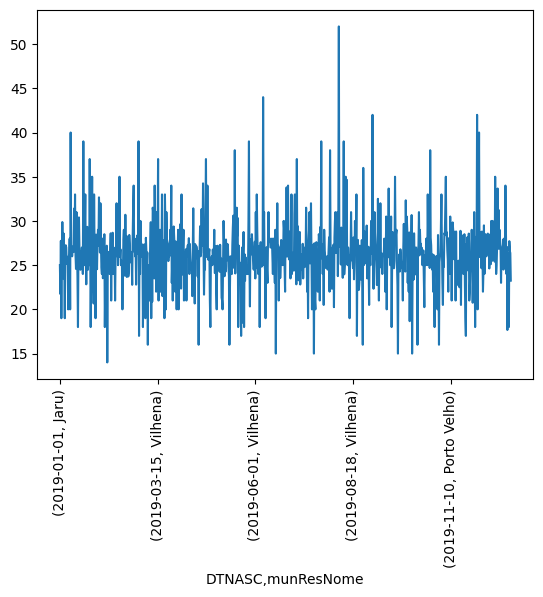

In [82]:
sinasc_idade_media_plot = sinasc_idade_media.set_index('munResNome')
idade_media_mae = sinasc_idade_media_plot.groupby(['DTNASC', mapping_mun_res_nome])['IDADEMAE'].mean(numeric_only=True)
idade_media_mae.plot(rot=90)

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


O Índice de Desenvolvimento Humano varia de 0 até 1, e nesta lista é dividido em cinco categorias:

IDH muito alto (0,800 – 1,000), 

IDH alto (0,700 – 0,799), 

IDH médio (0,600 0,699), 

IDH baixo (0,500 – 0,599) e 

IDH muito baixo (0,000 – 0,499).

In [83]:
municipios_rondonia_idh = {
"Porto Velho": 0.736,	
"Vilhena": 0.731,	
"Cacoal": 0.718,	
"Ji-Paraná": 0.714,	
"Pimenta Bueno": 0.710,	
"Ariquemes": 0.702,	
"Rolim de Moura": 0.700,	
"Cerejeiras": 0.692,	
"Jaru": 0.689,	
"Colorado do Oeste": 0.685,	
"Ouro Preto do Oeste": 0.682,	
"Espigão d'Oeste": 0.672,	
"Santa Luzia d'Oeste": 0.670,	
"Pimenteiras do Oeste": 0.665,	
"Presidente Médici": 0.664,	
"Castanheiras": 0.658,	
"Guajará-Mirim": 0.657,	
"Chupinguaia": 0.652,	
"Cabixi": 0.650,	
"Candeias do Jamari": 0.649,	
"São Felipe d'Oeste": 0.649,	
"Cacaulândia": 0.646,	
"São Miguel do Guaporé": 0.646,	
"Mirante da Serra": 0.643,	
"Alvorada d'Oeste": 0.643,	
"Teixeirópolis": 0.643,	
"Nova Brasilândia d'Oeste": 0.643,	
"Rio Crespo": 0.643,	
"Primavera de Rondônia": 0.641,	
"Alta Floresta d'Oeste": 0.641,	
"Ministro Andreazza": 0.638,	
"Novo Horizonte do Oeste": 0.634,	
"Vale do Paraíso": 0.627,	
"Alto Paraíso": 0.625,	
"Parecis": 0.617,	
"Buritis": 0.616,	
"Itapuã do Oeste": 0.614,	
"Corumbiara": 0.613,	
"Cujubim": 0.612,	
"Costa Marques": 0.611,	
"São Francisco do Guaporé": 0.611,	
"Urupá": 0.609,	
"Monte Negro": 0.607,	
"Seringueiras": 0.598,	
"Governador Jorge Teixeira": 0.596,	
"Machadinho d'Oeste": 0.596,	
"Campo Novo de Rondônia": 0.593,	
"Alto Alegre dos Parecis": 0.592,	
"Theobroma": 0.589,	
"Nova União": 0.587,	
"Nova Mamoré": 0.587,	
"Vale do Anari": 0.584	
}

mapping_municipios_rondonia_idh = {}
for key in municipios_rondonia_idh.keys():
    value = municipios_rondonia_idh[key]
    if value >= 0.800  :
        map_dict = {key: "Muito Alto"}
    if value >= 0.700 and value <= 0.799:
        map_dict = {key: "Alto"}
    if value >= 0.600 and value <= 0.699: 
        map_dict = {key: "Médio"}
    if value >= 0.500 and value <= 0.599:
        map_dict = {key: "Baixo"}
    if value <= 0.499:
        map_dict = {key: "Muito Baixo"}
    mapping_municipios_rondonia_idh.update(map_dict)


In [84]:
sinasc_idh = sinasc_idade_media.set_index('munResNome')
municipios_rondonia_idh = sinasc_idh.groupby(mapping_municipios_rondonia_idh).mean(numeric_only=True)
municipios_rondonia_idh

,IDADEMAE,QTDPARTNOR,QTDPARTCES
munResNome,,,
Alto,26.280332,0.578495,0.499454
Baixo,25.269231,0.620232,0.522376
Médio,25.848191,0.589560,0.548451


### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


Alto, resultados superiores a 0,8 pontos;

Moderado, resultados entre 0,6 e 0,8 pontos;

Regular, resultados entre 0,4 e 0,6 pontos;

Baixo, resultados inferiores a 0,4 pontos;

In [85]:
municipios_rondonia_ifdm = {
"Ariquemes": 0.7746,
"Vilhena": 0.7465,
"Pimenta Bueno": 0.7383,
"Porto Velho": 0.7257,
"Ji-Paraná": 0.7117,
"Cacoal": 0.7111,
"Santa Luzia d'Oeste": 0.6850,
"Rolim de Moura": 0.6785,
"Chupinguaia": 0.6766,
"São Miguel do Guaporé": 0.6699,
"Pimenteiras do Oeste": 0.6501,
"Teixeirópolis": 0.6500,
"Colorado do Oeste": 0.6473,
"Jaru": 0.6450,
"Rio Crespo": 0.6430,
"Primavera de Rondônia": 0.6384,
"Alta Floresta d'Oeste": 0.6337,
"Ouro Preto do Oeste": 0.6261,
"São Francisco do Guaporé": 0.6214,
"Candeias do Jamari": 0.6199,
"Buritis": 0.6199,
"São Felipe d'Oeste": 0.6153,
"Presidente Médici": 0.6140,
"Cerejeiras": 0.6137,
"Monte Negro": 0.6016,
"Urupá": 0.6006,
"Espigão d'Oeste": 0.5973,
"Seringueiras": 0.5922,
"Alvorada d'Oeste": 0.5919,
"Itapuã do Oeste": 0.5903,
"Cabixi": 0.5887,
"Novo Horizonte do Oeste": 0.5858,
"Nova Brasilândia d'Oeste": 0.5857,
"Vale do Paraíso": 0.5818,
"Corumbiara": 0.5759,
"Alto Paraíso": 0.5735,
"Cacaulândia": 0.5721,
"Vale do Anari": 0.5710,
"Ministro Andreazza": 0.5657,
"Costa Marques": 0.5626,
"Nova União": 0.5571,
"Guajará-Mirim": 0.5541,
"Mirante da Serra": 0.5519,
"Parecis": 0.5502,
"Castanheiras": 0.5430,
"Theobroma": 0.5405,
"Machadinho d'Oeste": 0.5322,
"Campo Novo de Rondônia": 0.5272,
"Nova Mamoré": 0.5084,
"Cujubim": 0.5055,
"Alto Alegre dos Parecis": 0.5046,
"Governador Jorge Teixeira": 0.4562
}

mapping_municipios_rondonia_ifdm = {}
for key in municipios_rondonia_ifdm.keys():
    value = municipios_rondonia_ifdm[key]
    if value > 0.8  :
        map_dict = {key: "Alto"}
    if value > 0.6 and value < 0.8:
        map_dict = {key: "Moderado"}
    if value > 0.4 and value < 0.6:
        map_dict = {key: "Regular"}
    if value < 0.4:
        map_dict = {key: "Baixo"}
    mapping_municipios_rondonia_ifdm.update(map_dict)

In [86]:
sinasc_ifdm = sinasc_idade_media.set_index('munResNome')
municipios_rondonia_ifdm = sinasc_ifdm.groupby(mapping_municipios_rondonia_ifdm).mean(numeric_only=True)
municipios_rondonia_ifdm

,IDADEMAE,QTDPARTNOR,QTDPARTCES
munResNome,,,
Moderado,26.226921,0.558033,0.517982
Regular,25.412005,0.728571,0.494034


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

In [87]:
municipios_rondonia_pib = {
"Porto Velho":17_912_070,
"Ji-Paraná":3_783_972,
"Vilhena":2_831_175,
"Ariquemes":2_579_830,
"Cacoal":2_261_644,
"Jaru":1_500_890,
"Rolim de Moura":1_283_434,
"Pimenta Bueno":1_164_877,
"Guajará-Mirim":893_000,
"Ouro Preto do Oeste":834_000,
"Buritis":726_000,
"Machadinho do Oeste":633_000,
"Espigão d'Oeste":625_000,
"São Miguel do Guaporé":616_000,
"Candeias do Jamari":548_000,
"Nova Mamoré":529_000,
"Cerejeiras":507_000,
"Alta Floresta do Oeste":496_000,
"Presidente Médici":428_000,
"Cujubim":385_000,
"Nova Brasilândia do Oeste":360_000,
"Alto Paraíso":358_000,
"São Francisco do Guaporé":353_000,
"Colorado do Oeste":335_000,
"Monte Negro":219_152,
"Alto Alegre dos Parecis":213_410,
"Campo Novo de Rondônia":208_821,
"Alvorada do Oeste":204_098,
"Chupinguaia":190_331,
"Corumbiara":188_218,
"Ministro Andreazza":174_633,
"Urupá":172_143,
"Costa Marques":171_878,
"Seringueiras":169_429,
"Mirante da Serra":163_955,
"Governador Jorge Teixeira":148_027,
"Theobroma":140_601,
"Santa Luzia do Oeste":135_934,
"Novo Horizonte do Oeste":129_399,
"Itapuã do Oeste":129_351,
"Vale do Paraíso":116_742,
"Cacaulândia":116_635,
"Cabixi":113_031,
"Vale do Anari":105_208,
"Nova União":92_346,
"Parecis":80_759,
"Rio Crespo":76_854,
"Pimenteiras do Oeste":76_756,
"Teixeirópolis":72_089,
"São Felipe do Oeste":72_084,
"Castanheiras":59_779,
"Primavera de Rondônia":52_908
}

mapping_municipios_rondonia_pib = {}
for key in municipios_rondonia_pib.keys():
    value = municipios_rondonia_pib[key]
    if value > 1_000_000  :
        map_dict = {key: "Acima de 1 Bilhão"}
    if value > 500_000 and value < 1_000_000:
        map_dict = {key: "Acima de 500 Milhões"}
    if value > 300_000 and value < 500_000:
        map_dict = {key: "Acima de 300 Milhões"}
    if value > 200_000 and value < 300_000:
        map_dict = {key: "Acima de 200 Milhões"}
    if value > 100_000 and value < 200_000:
        map_dict = {key: "Acima de 100 Milhões"}
    if value < 100_00:
        map_dict = {key: "Até 100 Milhões"}
    mapping_municipios_rondonia_pib.update(map_dict)

In [88]:
sinasc_pib = sinasc_idade_media.set_index('munResNome')
municipios_rondonia_pib = sinasc_pib.groupby(mapping_municipios_rondonia_pib).mean(numeric_only=True)
municipios_rondonia_pib

,IDADEMAE,QTDPARTNOR,QTDPARTCES
munResNome,,,
Acima de 1 Bilhão,26.265562,0.569137,0.499939
Acima de 100 Milhões,25.638424,0.487603,0.522602
Acima de 200 Milhões,25.146435,0.531674,0.623126
Acima de 300 Milhões,25.706070,0.527082,0.552674
Acima de 500 Milhões,25.785927,0.773682,0.545637


Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

Observando a comparação entre parto normal e cesariana em relação ao idh, ifdm e pib, somente os municipios mapeados pelo pib apresentam maior quantidade de partos normais quando o pib é abaixo de 500 milhões.